In [1]:
import os
import sys
import requests
import pandas as pd
import numpy as np
import QuantLib as ql
from pathlib import Path
from datetime import datetime
from datetime import timedelta
from model_settings import ms
notebook_dir = str(Path().resolve())

symbol='SPY'
url = str(
	'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol='+
	symbol+'&outputsize=full&apikey='+
	ms.av_key)
r = requests.get(url)
spots = pd.Series(pd.DataFrame(r.json()['Time Series (Daily)']).transpose()['4. close'].squeeze())
spots = pd.to_numeric(spots,errors='coerce')
print(spots)


pricing settings:
Actual/365 (Fixed) day counter
New York stock exchange calendar
compounding: continuous
frequency: annual

2024-10-11    579.5800
2024-10-10    576.1300
2024-10-09    577.1400
2024-10-08    573.1700
2024-10-07    567.8000
                ...   
1999-11-05    137.8750
1999-11-04    136.5312
1999-11-03    135.5000
1999-11-02    134.5937
1999-11-01    135.5625
Name: 4. close, Length: 6277, dtype: float64


# example data collection

let us collect the three most recent trading days and inspect the data

In [18]:
dates = spots.index
dates = dates[:3]
for date in dates:
    print(date)

2024-10-11
2024-10-10
2024-10-09


In [19]:
from historical_alphaVantage_collection import collect_av_link
chain = {}
for date in dates:
    spot = float(spots[date])
    link = collect_av_link(date,spot,symbol)
    printdate = datetime.strptime(date, '%Y-%m-%d').strftime('%A, %Y-%m-%d')
    chain[date] = link

In [20]:
print(type(chain))
for key in chain.keys():
    print(key)

<class 'dict'>
2024-10-11
2024-10-10
2024-10-09


In [21]:
contracts = []
for key,link in chain.items():
    contracts.append(link['raw_data'])
contracts = pd.concat(contracts,ignore_index=True)
contracts

,contractID,symbol,expiration,strike,type,last,mark,bid,bid_size,ask,ask_size,volume,open_interest,date,implied_volatility,delta,gamma,theta,vega,rho
0,SPY241011C00300000,SPY,2024-10-11,300.00,call,276.08,279.26,278.75,1,279.78,1,17,0,2024-10-11,3.87113,1.00000,0.00000,-0.14488,0.00000,0.00822
1,SPY241011P00300000,SPY,2024-10-11,300.00,put,0.00,0.01,0.00,0,0.01,3520,0,2009,2024-10-11,3.79825,-0.00032,0.00001,-0.24831,0.00036,-0.00001
2,SPY241011C00305000,SPY,2024-10-11,305.00,call,0.00,274.26,273.75,1,274.78,1,0,0,2024-10-11,3.80190,1.00000,0.00000,-0.14730,0.00000,0.00836
3,SPY241011P00305000,SPY,2024-10-11,305.00,put,0.00,0.01,0.00,0,0.01,194,0,1211,2024-10-11,3.70755,-0.00033,0.00001,-0.24781,0.00037,-0.00001
4,SPY241011C00310000,SPY,2024-10-11,310.00,call,0.00,269.26,268.75,1,269.78,1,0,0,2024-10-11,3.73267,1.00000,0.00000,-0.14971,0.00000,0.00849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29241,SPY270115P00890000,SPY,2027-01-15,890.00,put,0.00,313.46,311.00,10,315.92,10,0,0,2024-10-09,0.45412,-0.55215,0.00100,-0.03883,3.43818,-14.33941
29242,SPY270115C00895000,SPY,2027-01-15,895.00,call,1.31,1.84,0.31,138,3.38,138,0,2,2024-10-09,0.12227,0.04500,0.00089,-0.03386,0.82396,0.54743
29243,SPY270115P00895000,SPY,2027-01-15,895.00,put,0.00,318.46,316.00,10,320.92,10,0,0,2024-10-09,0.45839,-0.55234,0.00099,-0.03956,3.43796,-14.45592
29244,SPY270115C00900000,SPY,2027-01-15,900.00,call,1.19,1.16,1.15,3,1.17,1,49,402,2024-10-09,0.11449,0.03180,0.00072,-0.02397,0.62075,0.38997


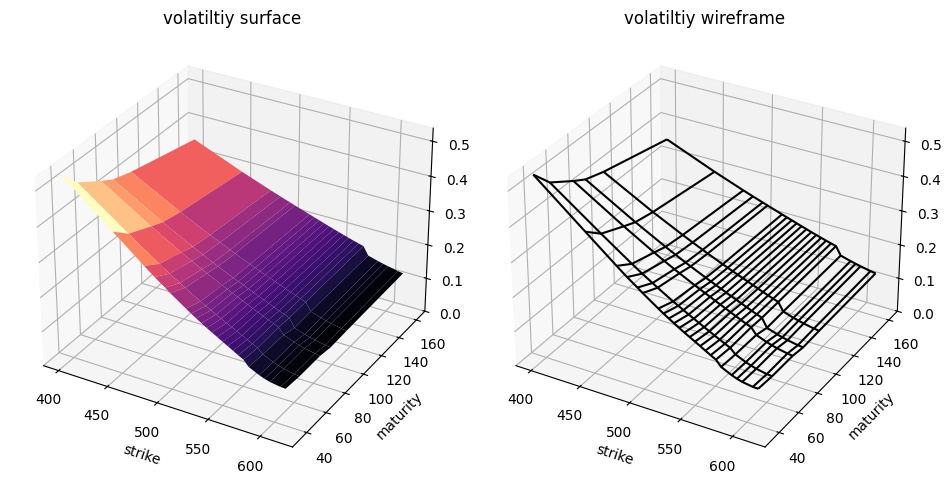

<Figure size 640x480 with 0 Axes>

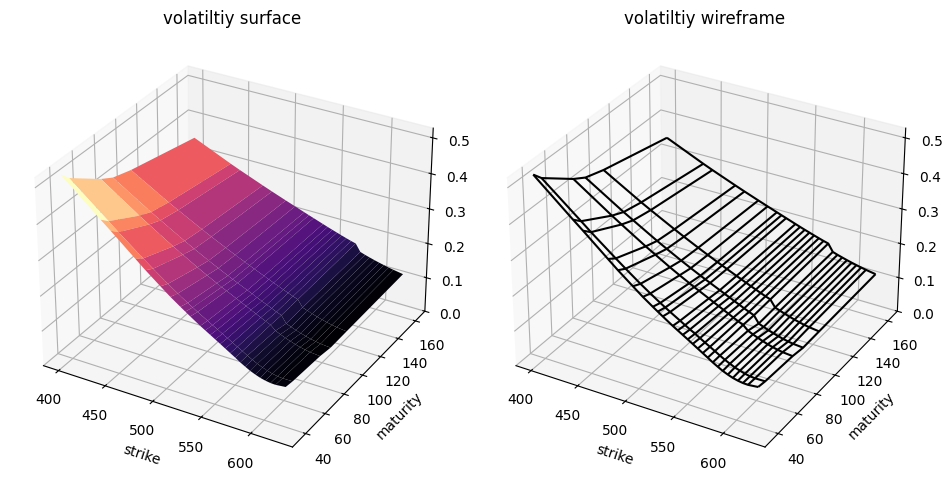

<Figure size 640x480 with 0 Axes>

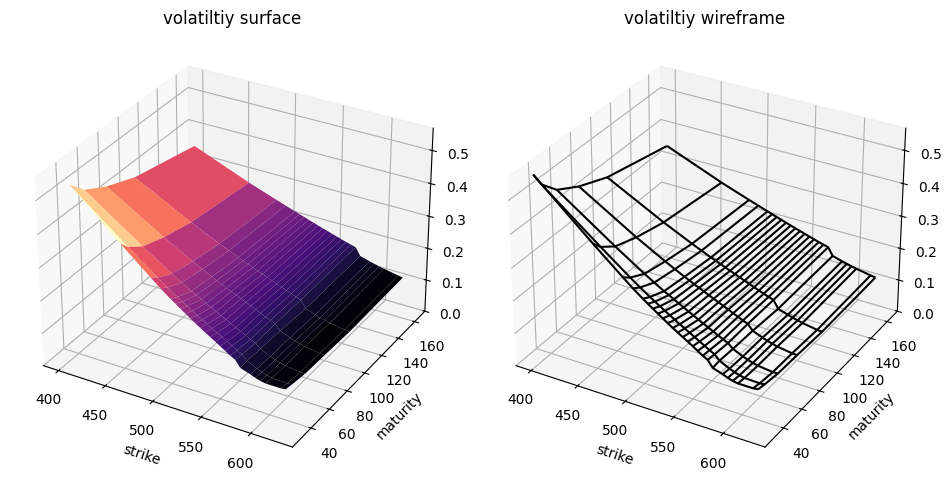

<Figure size 640x480 with 0 Axes>

In [22]:
from historical_av_plot_vol_surface import plot_vol_surface
for key,link in chain.items():
    plot_vol_surface(link['surface'])

# example calibraion

now why not select the most recent day and porceed with an example calibration

Friday, October 11th, 2024

SPY spot price: 579.58

           35       49       70       81       98       161
400.0  0.53705  0.48293  0.43827  0.41723  0.39970  0.35199
450.0  0.41997  0.38019  0.34985  0.33507  0.32333  0.29376
480.0  0.35001  0.32043  0.30016  0.28903  0.28141  0.26175
490.0  0.32729  0.30138  0.28431  0.27470  0.26815  0.25153
500.0  0.30656  0.28339  0.26937  0.26053  0.25504  0.24163
505.0  0.29544  0.27440  0.26190  0.25382  0.24849  0.23660
520.0  0.26510  0.24864  0.24041  0.23385  0.23004  0.22211
525.0  0.25534  0.24071  0.23370  0.22745  0.22410  0.21724
530.0  0.24605  0.23278  0.22684  0.22105  0.21815  0.21251
535.0  0.23720  0.22486  0.22028  0.21495  0.21221  0.20763
540.0  0.22821  0.21739  0.21342  0.20870  0.20657  0.20291
545.0  0.21967  0.20977  0.20687  0.20245  0.20077  0.19833
550.0  0.21160  0.20230  0.20016  0.19635  0.19498  0.19361
555.0  0.20321  0.19483  0.19361  0.19010  0.18919  0.18919
560.0  0.19513  0.18736  0.18705  0.18400  0.183

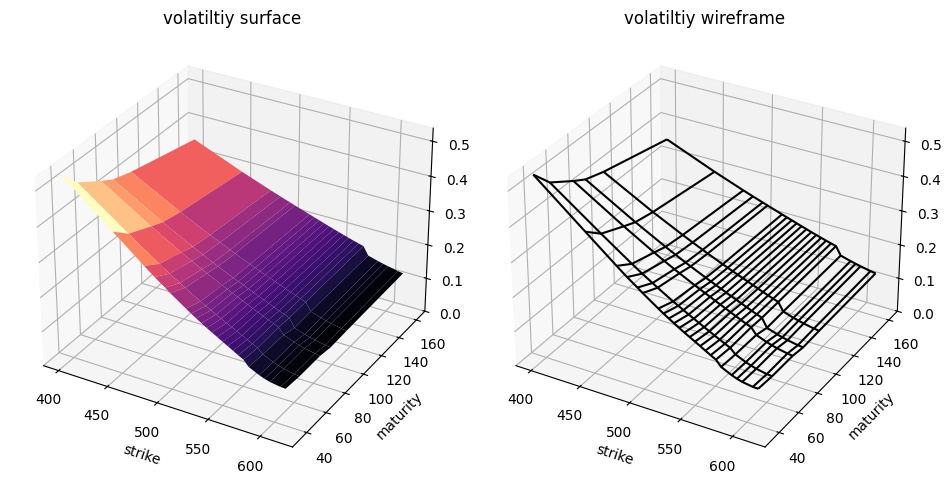

<Figure size 640x480 with 0 Axes>

In [28]:
date = dates[0]
calculation_datetime = datetime.strptime(date,'%Y-%m-%d')
calculation_date = ql.Date(
    calculation_datetime.day,
    calculation_datetime.month,
    calculation_datetime.year,
)
print(str(calculation_datetime.strftime('%A, '))+str(calculation_date))
vol_matrix = chain[date]['surface']
raw_data = chain[date]['raw_data']
contracts = chain[date]['hottest_contracts']
s = float(contracts['spot_price'].unique()[0])
print(f"\n{symbol} spot price: {s}")
print(f"\n{vol_matrix}\n")
plot_vol_surface(vol_matrix)

In [27]:
vol_matrix = vol_matrix.sort_index().drop_duplicates()
pd.to_numeric(raw_data['last'])
raw_data['date'] = pd.to_datetime(raw_data['date'])
raw_data['expiration'] = pd.to_datetime(raw_data['expiration'])
raw_data['implied_volatility'] = pd.to_numeric(raw_data['implied_volatility']).astype(float)
raw_data['strike'] = pd.to_numeric(raw_data['strike'])
raw_data['last'] = pd.to_numeric(raw_data['last'])
contract_maturities = np.array((raw_data['expiration'] - raw_data['date']) / timedelta(days=1)).astype(int)
raw_data['days_to_maturity'] = contract_maturities

T = vol_matrix.columns.tolist()
K = vol_matrix.index.tolist()
r = 0.04
g = 0.018

ql.Settings.instance().evaluationDate = calculation_date
flat_ts, dividend_ts = ms.ql_ts_rg(r, g, calculation_date)
S_handle = ql.QuoteHandle(ql.SimpleQuote(s))

heston_helpers = []
v0 = 0.01; kappa = 0.2; theta = 0.02; rho = -0.75; eta = 0.5;
process = ql.HestonProcess(
    flat_ts,
    dividend_ts,
    S_handle,
    v0,                # Initial volatility
    kappa,             # Mean reversion speed
    theta,             # Long-run variance (volatility squared)
    eta,               # Volatility of the volatility
    rho                # Correlation between asset and volatility
)
model = ql.HestonModel(process)
engine = ql.AnalyticHestonEngine(model)

for t in T:
    for k in K:
        p = ql.Period(int(t),ql.Days)
        volatility = vol_matrix.loc[k,t]
        helper = ql.HestonModelHelper(
            p, ms.calendar, float(s), k, 
            ql.QuoteHandle(ql.SimpleQuote(volatility)), 
            flat_ts, 
            dividend_ts
            )
        helper.setPricingEngine(engine)
        heston_helpers.append(helper)

lm = ql.LevenbergMarquardt(1e-8, 1e-8, 1e-8)


model.calibrate(heston_helpers, lm,
                  ql.EndCriteria(1000, 50, 1.0e-8,1.0e-8, 1.0e-8))

theta, kappa, eta, rho, v0 = model.params()
heston_parameters = pd.Series(
    [theta, kappa, eta, rho, v0],
    index = ['theta', 'kappa', 'eta', 'rho', 'v0'],
    dtype = float
)


calibration_test_data = raw_data.copy()[['strike','type','last','implied_volatility','days_to_maturity']]
calibration_test_data.columns = ['strike_price','w','market_price','volatility','days_to_maturity']
calibration_test_data['spot_price'] = s
calibration_test_data['risk_free_rate'] = r
calibration_test_data['dividend_rate'] = g
calibration_test_data = calibration_test_data[calibration_test_data['days_to_maturity'].isin(contracts['days_to_maturity'])]
calibration_test_data = calibration_test_data[calibration_test_data['days_to_maturity'].isin(contracts['days_to_maturity'])]

calibration_test_data[heston_parameters.index.tolist()] = np.tile(heston_parameters,(calibration_test_data.shape[0],1))
calibration_test_data.loc[:,'moneyness'] = ms.vmoneyness(calibration_test_data['spot_price'].values,calibration_test_data['strike_price'].values,calibration_test_data['w'].values)
calibration_test_data['calculation_date'] = calculation_datetime
calibration_test_data['black_scholes'] = ms.vector_black_scholes(calibration_test_data)
calibration_test_data['heston_price'] = ms.vector_heston_price(calibration_test_data)
calibration_test_data.loc[:,'error'] = calibration_test_data['heston_price'].values - calibration_test_data['black_scholes'].values
avg = np.mean(np.abs(calibration_test_data['error']))
print(f"\n{printdate}\n{heston_parameters}\naverage absolute error: {round(avg,4)}%")


Wednesday, 2024-10-09
theta    0.059568
kappa    6.604352
eta      3.932634
rho     -0.670306
v0       0.045342
dtype: float64
average absolute error: 1.1953%
